In this tutorial, we will implement and discuss variants of modern CNN architectures. \
There have been many different architectures been proposed over the past few years. \
Some of the most impactful ones, and still relevant today, are the following: GoogleNet/Inception architecture (winner of ILSVRC 2014), ResNet (winner of ILSVRC 2015), and DenseNet (best paper award CVPR 2017). \
All of them were state-of-the-art models when being proposed, and the core ideas of these networks are the foundations for most current state-of-the-art architectures. \
Thus, it is important to understand these architectures in detail and learn how to implement them. 

https://arxiv.org/abs/1409.4842

https://arxiv.org/abs/1512.03385

https://arxiv.org/abs/1608.06993


Files already downloaded and verified
Files already downloaded and verified
Train data size:  50000
Test data size:  10000
Classes:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Class to index mapping:  {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9} 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
TRAIN DATA:


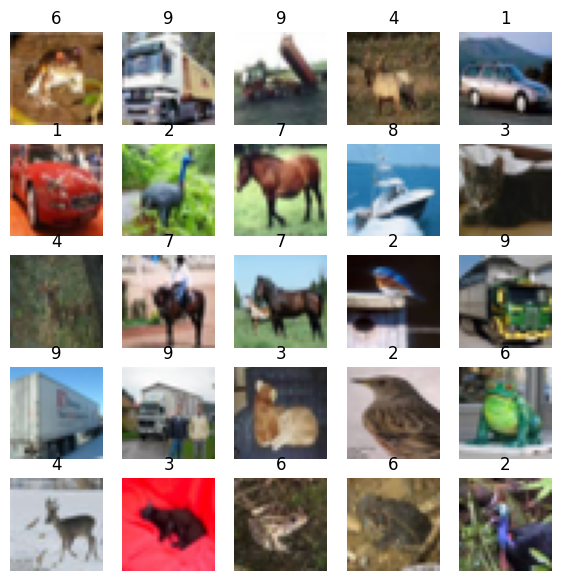

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
TEST DATA:


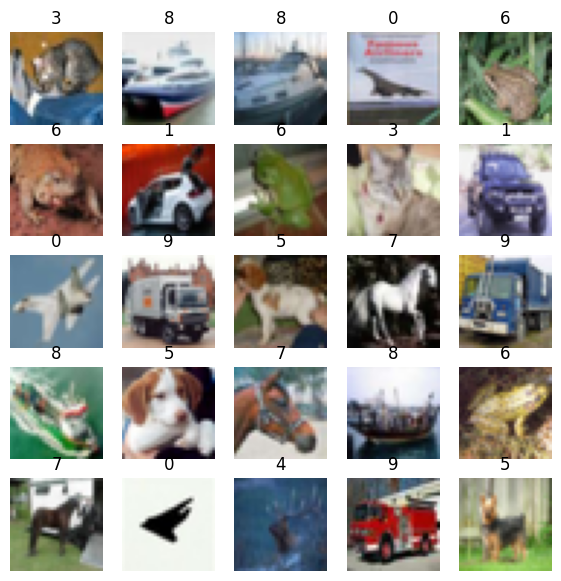

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [1]:
# Lets first download the CIFAR10 dataset

#!pip install torchvision
from torchvision.datasets.cifar import CIFAR10

train_data = CIFAR10('./data', train=True, download=True)
test_data = CIFAR10('./data', train=False, download=True)

print('Train data size: ', len(train_data))
print('Test data size: ', len(test_data))

# Lets look at some of the images
import matplotlib.pyplot as plt
import numpy as np

print('Classes: ', train_data.classes)
print('Class to index mapping: ', train_data.class_to_idx, '\n')

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("TRAIN DATA:")
fig, axes = plt.subplots(5, 5, figsize=(7, 7))
for i, ax in enumerate(axes.flat):
    img, label = train_data[i]
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')
plt.show()
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")


print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("TEST DATA:")
fig, axes = plt.subplots(5, 5, figsize=(7, 7))
for i, ax in enumerate(axes.flat):
    img, label = test_data[i]
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')
plt.show()
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")


In [2]:
DATA_MEANS = (train_data.data).mean(axis=(0,1,2))
DATA_STD = (train_data.data).std(axis=(0,1,2))

print("mean and std of the dataset:")
print("Data mean:", DATA_MEANS)
print("Data std:", DATA_STD)

#lets rescale the mean and std to be between 0 and 1
DATA_MEANS = DATA_MEANS/255
DATA_STD = DATA_STD/255

print("\n")

print("mean and std of the dataset after rescaling:")
print("Data mean:", DATA_MEANS)
print("Data std:", DATA_STD)


mean and std of the dataset:
Data mean: [125.30691805 122.95039414 113.86538318]
Data std: [62.99321928 62.08870764 66.70489964]


mean and std of the dataset after rescaling:
Data mean: [0.49139968 0.48215841 0.44653091]
Data std: [0.24703223 0.24348513 0.26158784]


### torchvision.transforms module

https://pytorch.org/vision/0.9/transforms.html 

Transforms are common image transformations. 

They can be chained together using Compose. 

Additionally, there is the torchvision.transforms.functional module. 

Functional transforms give fine-grained control over the transformations. 

This is useful if you have to build a more complex transformation pipeline (e.g. in the case of segmentation tasks).


In [3]:
# All transformations accept PIL Image, Tensor Image or batch of Tensor Images as input. 
# Tensor Image is a tensor with (C, H, W) shape, where C is a number of channels, H and W are image height and width. 
# Batch of Tensor Images is a tensor of (B, C, H, W) shape, where B is a number of images in the batch. 
# Deterministic or random transformations applied on the batch of Tensor Images identically transform all the images of the batch.

# here we are using the following transformations:
# 1. normalize: normalizes the image with mean and standard deviation
# 2. random horizontal flip: flips the image horizontally with a probability of 0.5
# 3. random resize crop: crops the image to the given size and resizes it to the given size
#    torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=<InterpolationMode.BILINEAR: 'bilinear'>)
#    size (sequence or int) – This crop is finally resized to given size
#    scale (tuple of float (min, max)) – Range of the random size of the cropped image compared to the original image (default=(0.08, 1.0))
#    ratio (tuple of float (min, max)) – Range of aspect ratio of the origin aspect ratio cropped image (default=(3. / 4., 4. / 3.))

#import transforms from torchvision
from torchvision import transforms

#let create a transform object
train_transform = transforms.Compose([
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomResizedCrop((32,32), scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=DATA_MEANS,std=DATA_STD)])  

test_transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=DATA_MEANS,std=DATA_STD)])

#we can apply the transform object to the dataset
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=test_transform)

import torch

#lets split the train dataset into train and validation
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [45000, 5000])

#print the size of the datasets
print("Train dataset size: ", len(train_dataset))
print("Validation dataset size: ", len(val_dataset))
print("Test dataset size: ", len(test_dataset))

Files already downloaded and verified
Files already downloaded and verified
Train dataset size:  45000
Validation dataset size:  5000
Test dataset size:  10000


In [4]:
# using dataloader

# train_data and test_data: without transform
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

try:
    images, labels = next(iter(train_loader))
except Exception as e:
    print(e)

# train_dataset, val_dataset and test_dataset: with transform
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=4)

try:
    images, labels = next(iter(train_loader))
    print("Train batch data:", images.shape)
    print("Train batch labels:", labels.shape)
except Exception as e:
    print(e)

default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>
Train batch data: torch.Size([64, 3, 32, 32])
Train batch labels: torch.Size([64])


In [5]:
#find mean and std of the batch data
imgs, label = next(iter(train_loader))
print(imgs.mean(dim=[0,2,3]), imgs.std(dim=[0,2,3]))

tensor([-0.0261, -0.0713, -0.0864]) tensor([0.9531, 0.9685, 0.9575])
